<a href="https://colab.research.google.com/github/Saurabh08281997/TimeSeriesEDA/blob/main/ARIMAandSARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [2]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! kaggle datasets download -d rakannimer/air-passengers

air-passengers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip air-passengers.zip

Archive:  air-passengers.zip
replace AirPassengers.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [ ]:
df_airline=pd.read_csv('AirPassengers.csv')
df_airline.head()

In [ ]:
df_airline.isnull().sum()

In [ ]:
df_airline.tail()

In [ ]:
df_airline.dropna(axis=0,inplace=True)

In [ ]:
df_airline.isnull().sum()

In [ ]:
df_airline.info()

In [ ]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [ ]:
df_airline["#Passengers"] = df_airline["#Passengers"].astype('float')

In [ ]:
df_airline.info()

In [ ]:
df_airline.head()

In [ ]:
df_airline.set_index('Month',inplace=True)

In [ ]:
df_airline.head()

In [ ]:
df_airline.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df_airline['#Passengers'])

In [ ]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['#Passengers']-df_airline['#Passengers'].shift(1)

In [ ]:
df_airline.head()

In [24]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700056
p- value: 0.054213290283824704
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [25]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [26]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468495
p- value: 2.7328918500143186e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [27]:
### 12 months 
## Use Techniques Differencing
df_airline['Passengers 12 Difference']=df_airline['#Passengers']-df_airline['#Passengers'].shift(12)

In [28]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

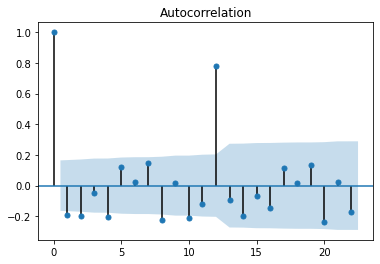

In [30]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

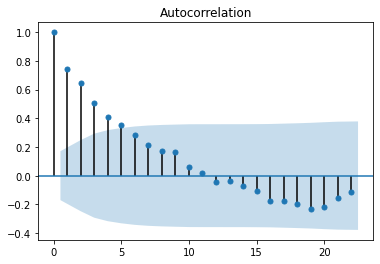

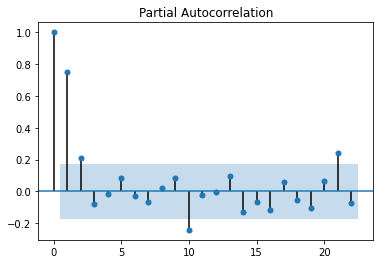

In [31]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


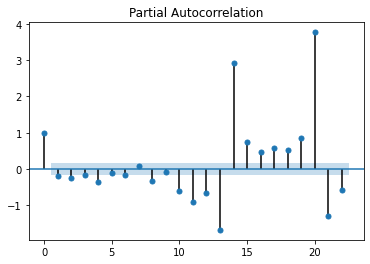

In [32]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

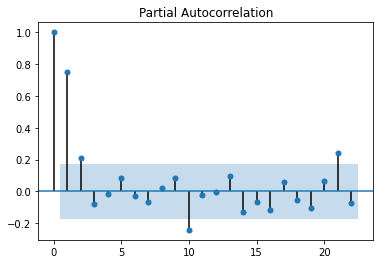

In [33]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [34]:
### split train and test data
df_airline

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [35]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [36]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [37]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [38]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [39]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

In [40]:
train_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [41]:
model_ARIMA=ARIMA(train_data['#Passengers'],order=(0,2,0))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [42]:
model_Arima_fit=model_ARIMA.fit()

In [43]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D2.#Passengers   No. Observations:                   82
Model:                 ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                           css   S.D. of innovations             26.728
Date:                Tue, 19 Jul 2022   AIC                            775.563
Time:                        15:06:37   BIC                            780.377
Sample:                    03-01-1949   HQIC                           777.496
                         - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [44]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [45]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [46]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['#Passengers']-pred

In [47]:
pred

1956-01-01    0.426829
1956-02-01    0.426829
1956-03-01    0.426829
1956-04-01    0.426829
1956-05-01    0.426829
1956-06-01    0.426829
1956-07-01    0.426829
1956-08-01    0.426829
1956-09-01    0.426829
1956-10-01    0.426829
1956-11-01    0.426829
1956-12-01    0.426829
1957-01-01    0.426829
1957-02-01    0.426829
1957-03-01    0.426829
1957-04-01    0.426829
1957-05-01    0.426829
1957-06-01    0.426829
1957-07-01    0.426829
1957-08-01    0.426829
1957-09-01    0.426829
1957-10-01    0.426829
1957-11-01    0.426829
1957-12-01    0.426829
1958-01-01    0.426829
1958-02-01    0.426829
1958-03-01    0.426829
1958-04-01    0.426829
1958-05-01    0.426829
1958-06-01    0.426829
1958-07-01    0.426829
1958-08-01    0.426829
1958-09-01    0.426829
1958-10-01    0.426829
1958-11-01    0.426829
1958-12-01    0.426829
1959-01-01    0.426829
1959-02-01    0.426829
1959-03-01    0.426829
1959-04-01    0.426829
1959-05-01    0.426829
1959-06-01    0.426829
1959-07-01    0.426829
1959-08-01 

In [48]:
residuals

Month
1956-01-01    283.573171
1956-02-01    276.573171
1956-03-01    316.573171
1956-04-01    312.573171
1956-05-01    317.573171
1956-06-01    373.573171
1956-07-01    412.573171
1956-08-01    404.573171
1956-09-01    354.573171
1956-10-01    305.573171
1956-11-01    270.573171
1956-12-01    305.573171
1957-01-01    314.573171
1957-02-01    300.573171
1957-03-01    355.573171
1957-04-01    347.573171
1957-05-01    354.573171
1957-06-01    421.573171
1957-07-01    464.573171
1957-08-01    466.573171
1957-09-01    403.573171
1957-10-01    346.573171
1957-11-01    304.573171
1957-12-01    335.573171
1958-01-01    339.573171
1958-02-01    317.573171
1958-03-01    361.573171
1958-04-01    347.573171
1958-05-01    362.573171
1958-06-01    434.573171
1958-07-01    490.573171
1958-08-01    504.573171
1958-09-01    403.573171
1958-10-01    358.573171
1958-11-01    309.573171
1958-12-01    336.573171
1959-01-01    359.573171
1959-02-01    341.573171
1959-03-01    405.573171
1959-04-01    395.5

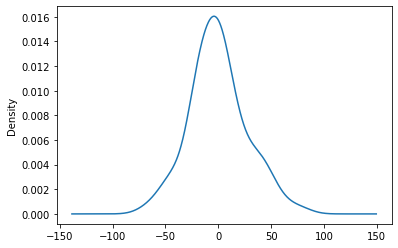

In [49]:
model_Arima_fit.resid.plot(kind='kde')

In [50]:
test_data['Predicted_ARIMA']=pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


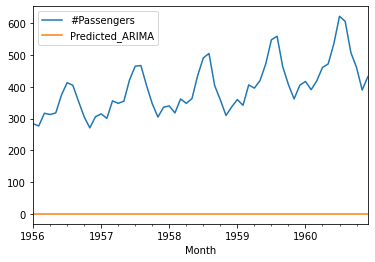

In [52]:
test_data[['#Passengers','Predicted_ARIMA']].plot()

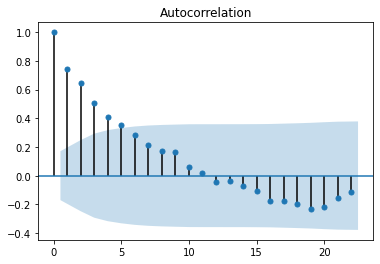

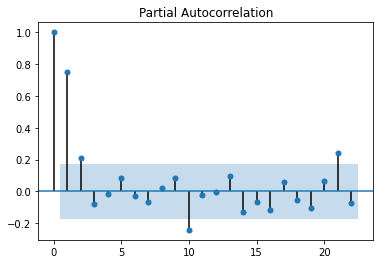

In [53]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

In [54]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [55]:
model_SARIMA=SARIMAX(train_data['#Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [56]:
model_SARIMA_fit=model_SARIMA.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [57]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, 0, 12)   Log Likelihood                -265.240
Date:                            Tue, 19 Jul 2022   AIC                            548.481
Time:                                    15:10:07   BIC                            568.971
Sample:                                01-01-1949   HQIC                           556.638
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5983      0.938      0.638      0.523      -1.240       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4525      0.894     -0.506      0.613      -2.205       1.300
ma.L1          0.1837      1.164      0.158      0.875      -2.097       2.465
ma.L2         -0.5342      1.261     -0.423      0.672      -3.006       1.938
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1273      0.337     -0.378      0.706      -0.788       0.533
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7325     81.050      1.082      0.279     -71.123     246.588
===================================================================================
Ljung-Box (Q):                       27.22   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.94   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
test_data.tail()

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,0.426829
1960-09-01,508.0,-98.0,-82.0,45.0,0.426829
1960-10-01,461.0,-47.0,51.0,54.0,0.426829
1960-11-01,390.0,-71.0,-24.0,28.0,0.426829
1960-12-01,432.0,42.0,113.0,27.0,0.426829


In [60]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [63]:
pred_Sarima=model_SARIMA_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['#Passengers']-pred_Sarima

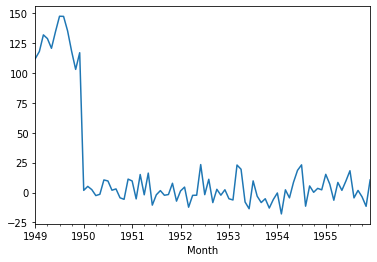

In [64]:
model_SARIMA_fit.resid.plot()

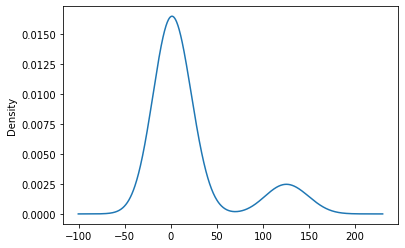

In [65]:
model_SARIMA_fit.resid.plot(kind='kde')

In [66]:
test_data['Predicted_SARIMA']=pred_Sarima

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
test_data

,#Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,0.426829,286.185246
1956-02-01,277.0,-7.0,-13.0,44.0,0.426829,281.277527
1956-03-01,317.0,40.0,47.0,50.0,0.426829,309.916979
1956-04-01,313.0,-4.0,-44.0,44.0,0.426829,310.677274
1956-05-01,318.0,5.0,9.0,48.0,0.426829,311.335309
1956-06-01,374.0,56.0,51.0,59.0,0.426829,354.950168
1956-07-01,413.0,39.0,-17.0,49.0,0.426829,403.398187
1956-08-01,405.0,-8.0,-47.0,58.0,0.426829,385.071431
1956-09-01,355.0,-50.0,-42.0,43.0,0.426829,349.445647


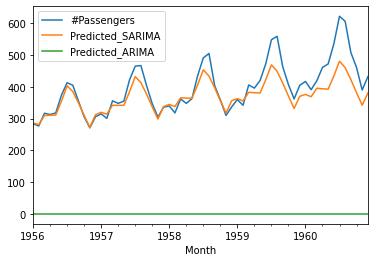

In [68]:
test_data[['#Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()